In [1]:
import os
import json
from PIL import Image
import pandas as pd

# Paths to the images and labels folders
images_dir = "images"
labels_dir = "labels"

# Function to load images and labels into a DataFrame
def load_images_and_labels_to_dataframe(images_dir, labels_dir):
    data = []

    # Iterate through all JSON label files in the labels folder
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".json"):
            label_path = os.path.join(labels_dir, label_file)
            
            # Load label data
            with open(label_path, "r") as f:
                json_data = json.load(f)
            
            # Get corresponding image file
            image_file = json_data.get("image_id")
            if image_file:
                image_path = os.path.join(images_dir, image_file)
                if os.path.exists(image_path):
                    try:
                        # Load image (optional: convert to numpy array or keep path for simplicity)
                        image = Image.open(image_path)
                        image_data = {
                            "image_path": image_path,
                            "image": image,  # Add image object if needed
                            "red_count": json_data.get("red_count", 0),
                            "green_count": json_data.get("green_count", 0),
                            "blue_count": json_data.get("blue_count", 0)
                        }
                        data.append(image_data)
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

# Load the data into a DataFrame
bottle_df = load_images_and_labels_to_dataframe(images_dir, labels_dir)

# Display the DataFrame
bottle_df.head()

,image_path,image,red_count,green_count,blue_count
0,images/img_20241111_162305.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,15,15,15
1,images/img_20241111_151505.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,5,30
2,images/img_20241111_160044.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,15,15,40
3,images/img_20241111_154937.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,20,15,0
4,images/img_20241111_152228.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,25,20,30


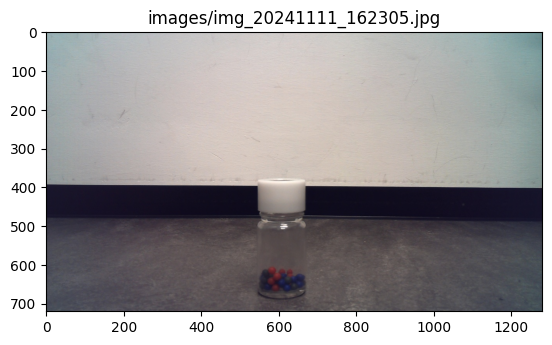

red_count      15
green_count    15
blue_count     15
Name: 0, dtype: object

In [2]:
import matplotlib.pyplot as plt

plt.imshow(bottle_df.iloc[0, 1])
plt.title(bottle_df.iloc[0, 0])
plt.show()
bottle_df.loc[0, "red_count":"blue_count"]

In [3]:
bottle_df.shape

(400, 5)